In [47]:
import numpy as np
import pandas as pd

In [48]:
data=pd.read_csv('/content/diabetes.csv')

In [49]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 1 :Check if the data is in Nomal Standard form

In [50]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
data=data.drop(columns=['Outcome'],axis=1)

In [52]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
datascaled=scaler.fit_transform(data)

In [54]:
datascaled=pd.DataFrame(datascaled)
datascaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [55]:
datascaled.describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


**Step 2 :Covariance Matrix**

In [56]:
covarianceMatrix=datascaled.T @ data / 767 #(here 767= #of datapoints - 1 )

In [57]:
covarianceMatrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.371774,4.141830,2.736409,-1.303695,-8.479946,0.139507,-0.011114,6.405751
1,0.436505,31.993454,2.955419,0.915103,38.211805,1.744096,0.045533,3.101009
2,0.476371,4.881868,19.368421,3.310176,10.255718,2.223246,0.013681,2.818740
3,-0.275379,1.834117,4.016440,15.962613,50.369375,3.097127,0.060980,-1.341190
4,-0.247942,10.601258,1.722499,6.972191,115.319104,1.560969,0.061359,-0.496169
5,0.059623,7.072827,5.458123,6.266494,22.816929,7.889298,0.046631,0.426491
6,-0.113031,4.393895,0.799237,2.935965,21.342214,1.109606,0.331545,0.394946
7,1.835396,8.430733,4.639278,-1.819263,-4.862194,0.285923,0.011127,11.767895


****Step 3 :Evaluate Eigen values and eigen Vectors using Covariance Matrix****

In [58]:
eigenValues,eigenVectors=np.linalg.eig(covarianceMatrix)

In [59]:
eigenValues

array([123.93267197,  31.18941672,  20.96201643,  12.93824647,
         9.17971577,   2.13889429,   0.3103312 ,   5.35281191])

In [60]:
eigenVectors

array([[-4.67133909e-02,  2.81813671e-01,  8.14410395e-02,
         3.50441860e-01,  4.92763113e-01,  9.77634509e-01,
         7.10320223e-03, -1.83615975e-02],
       [ 3.44667645e-01,  7.25709174e-01, -2.45332135e-01,
        -1.94815070e-01, -7.05416178e-02,  4.25592554e-03,
        -8.27257435e-04,  6.43356905e-02],
       [ 1.11123154e-01,  3.46332341e-01,  7.60193975e-01,
         2.18909652e-01, -3.24327510e-01,  3.82242871e-03,
         5.56683914e-04,  7.03594826e-02],
       [ 3.90917502e-01, -1.20754459e-01,  4.57257158e-01,
        -5.72984658e-01,  3.76981622e-01, -3.66460990e-03,
        -2.60691049e-03,  2.98199341e-01],
       [ 8.03181967e-01, -8.85729525e-02, -2.53535493e-02,
         6.51746010e-02, -1.02507166e-02,  1.18240686e-03,
        -2.64135181e-04, -1.28258431e-02],
       [ 2.05270599e-01,  1.91465045e-01,  3.63665869e-01,
        -4.04542519e-01,  1.44992946e-01, -4.77773519e-03,
        -2.76371910e-03, -9.49098591e-01],
       [ 1.62793021e-01,  5.130535

**Step 4 :Get PC1,PC2,PC3...etc based of eigen Values and eigenVectors**

In [61]:
PC1_data =datascaled @ eigenVectors[:,0]

In [62]:
PC2_data =datascaled @ eigenVectors[:,1]

In [63]:
PC3_data =datascaled @ eigenVectors[:,7]

**PCA Implementation via thesklearn Library**

In [64]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit_transform(datascaled)

array([[ 1.06850273,  1.23489499, -0.09592984],
       [-1.12168331, -0.73385167,  0.71293816],
       [-0.39647671,  1.59587594, -1.76067844],
       ...,
       [-0.28347525,  0.09706503,  0.07719194],
       [-1.06032431,  0.83706234, -0.42503045],
       [-0.83989172, -1.15175485,  1.00917817]])

In [65]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(datascaled)

array([[ 1.06850273,  1.23489499, -0.09592984, ...,  0.35718251,
         0.85882133,  0.97430355],
       [-1.12168331, -0.73385167,  0.71293816, ..., -0.40632934,
         0.75703403,  0.35421454],
       [-0.39647671,  1.59587594, -1.76067844, ..., -0.04001752,
        -1.15299029,  1.06852795],
       ...,
       [-0.28347525,  0.09706503,  0.07719194, ..., -0.53826993,
        -0.33556321,  0.2894389 ],
       [-1.06032431,  0.83706234, -0.42503045, ...,  0.15330712,
         1.18030813, -0.53434386],
       [-0.83989172, -1.15175485,  1.00917817, ..., -0.15009639,
         0.24523536,  0.51594622]])

In [66]:
pca.explained_variance_ratio_

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

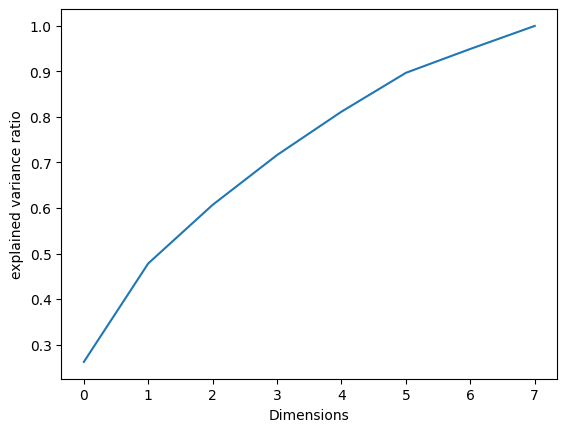

In [67]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensions')
plt.ylabel('explained variance ratio')
plt.savefig('Screenplot.png')
plt.show()